
# Project:  Soccer Database 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The purpose of this project is analyze data downloaded from kaggle (European Soccer Database) as "database.sqlite" file.

Its contain data for euro team matchs from 2008 to 2016.

After analysis and explore the data we will answer belowe questions:

1- which teams had scored the most goals in one season?

2- what is the team attributes lead to most score in one season?




<a id='wrangling'></a>
## Data Wrangling



Import Libraries

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

load data

In [2]:
database = "database.sqlite"
connection = sql.connect(database)
df_country = pd.read_sql('''SELECT * FROM Country ''',connection)
df_league = pd.read_sql('''SELECT * FROM League ''',connection)
df_match = pd.read_sql('''SELECT * FROM Match ''',connection)
df_team = pd.read_sql('''SELECT * FROM Team''',connection)
df_team_attributes = pd.read_sql('''SELECT * FROM Team_Attributes''',connection)
df_sqlite_sequence = pd.read_sql('''SELECT * FROM sqlite_sequence''',connection)

<a id='eda'></a>
## Exploratory Data Analysis





Create a function to explore  the data:

    * Shape 
    * info
    * head
    * describe
    * uplicate
    * Null values

In [3]:
def explore(table):
    
    print("Shape table is : ", table.shape)
    print("_" * 100)
    print(table.info())         
    print("_" * 100)
    print(table.head())
    print("_" * 100)
    print("Number of duplicated rows is : " , table.duplicated().sum())    
    print("_" * 100)
    print(table.describe())
    print("_" * 100)
    print("Number of null values is : ", table.isnull().sum().sum())
    print("_" * 100)

Explore league

In [4]:
explore(df_league)

Shape table is :  (11, 3)
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes
None
____________________________________________________________________________________________________
      id  country_id                    name
0      1           1  Belgium Jupiler League
1   1729        1729  England Premier League
2   4769        4769          France Ligue 1
3   7809        7809   Germany 1. Bundesliga
4  10257       10257           Italy Serie A
____________________________________________________________________________________________________
Number of duplicated rows is :  0
_____

Explore match

In [5]:
explore(df_match)

Shape table is :  (25979, 115)
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
None
____________________________________________________________________________________________________
   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
0        492473              9987              9993               1  ...   
1        4

Explore team

In [6]:
explore(df_team)

Shape table is :  (299, 5)
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
None
____________________________________________________________________________________________________
   id  team_api_id  team_fifa_api_id     team_long_name team_short_name
0   1         9987             673.0           KRC Genk             GEN
1   2         9993             675.0       Beerschot AC             BAC
2   3        10000           15005.0   SV Zulte-Warege

Expolre team attributes

In [7]:
explore(df_team_attributes)

Shape table is :  (1458, 25)
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClas

Neglected "build Up Play Dribbling " in secend question.

### Calculate the number of goals that scored by each team in each season by merge match and team table.






Select related columns from match table and team table.


In [8]:
match_table = df_match[["season","home_team_api_id","away_team_api_id","home_team_goal","away_team_goal"]]

In [9]:
team_table = df_team[["team_api_id","team_long_name"]]

First merge table to rename "home_team_api_id" as " home_team

In [10]:
match_result_home = pd.merge(match_table,team_table,left_on="home_team_api_id",right_on="team_api_id").rename({"team_long_name":"home_team"},axis = 1)

Secend merge to rename "away_team_api_id" as away_team

In [11]:
match_results = pd.merge(match_result_home,team_table,left_on="away_team_api_id",right_on="team_api_id").rename({"team_long_name":"away_team"},axis = 1)

Sum numbers of home goals for each teams

In [12]:
home_goals = match_results.groupby(["home_team","season"])["home_team_goal"].sum()

Sum numbers of away goals for each teams

In [13]:
away_goals = match_results.groupby(["away_team","season"])["away_team_goal"].sum()

Compine home_goals and away_goals table

In [14]:
total_goal = pd.concat([home_goals, away_goals], axis=1).reset_index().rename({"level_0":"team"}, axis='columns')

In [15]:
total_goal["total_goal"] = total_goal.sum(axis = 1)

In [16]:
total_goal.sort_values(by='total_goal', ascending=False)[:10]

,team,season,home_team_goal,away_team_goal,total_goal
1047,Real Madrid CF,2011/2012,70,51,121
1050,Real Madrid CF,2014/2015,65,53,118
353,FC Barcelona,2012/2013,63,52,115
352,FC Barcelona,2011/2012,73,41,114
356,FC Barcelona,2015/2016,67,45,112
1051,Real Madrid CF,2015/2016,70,40,110
355,FC Barcelona,2014/2015,64,46,110
83,Ajax,2009/2010,64,42,106
349,FC Barcelona,2008/2009,61,44,105
1049,Real Madrid CF,2013/2014,63,41,104


## Research Question 1

### 1- which teams had scored the most goals in one season?

Concatenate team and season after exteact the first year of season

In [17]:
total_goal["year"] = total_goal["season"].str[:4]

In [18]:
total_goal["team_year"] = total_goal["team"] + " " + total_goal["year"]

In [19]:
team_goal = total_goal[["team_year","total_goal"]].sort_values(by='total_goal', ascending=False)

In [20]:
most_team_score_per_year = team_goal[:9]

In [21]:
most_team_score_per_year 

,team_year,total_goal
1047,Real Madrid CF 2011,121
1050,Real Madrid CF 2014,118
353,FC Barcelona 2012,115
352,FC Barcelona 2011,114
356,FC Barcelona 2015,112
1051,Real Madrid CF 2015,110
355,FC Barcelona 2014,110
83,Ajax 2009,106
349,FC Barcelona 2008,105


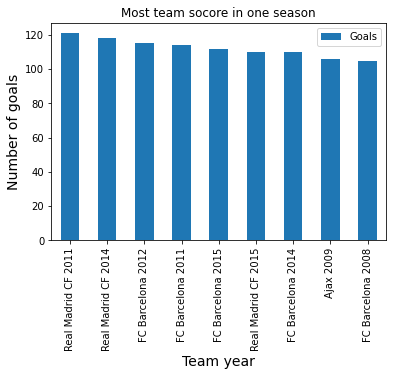

In [22]:
most_team_score_per_year.plot(x = "team_year" , y = "total_goal" , kind = "bar",
                              fontsize = 10,title = "Most team socore in one season" );
plt.xlabel("Team year",fontsize = 14);
plt.ylabel("Number of goals",fontsize = 14);
plt.legend(["Goals"]);


### The most team socore in one team is Real Madrid in 2011 with 121 goals.	

## Research Question 2


### 2- what is the team attributes that lead to most score in one season?





Merge team attributes table with numbers goal per team per one season.

In [23]:
team_attributes =df_team_attributes

In [24]:
team_attributes = pd.merge(team_attributes,team_table,on="team_api_id").rename({"team_long_name":"team"},axis = 1)

Concatenate team and season in one columns

In [25]:
team_attributes["year"] = team_attributes["date"].str[:4]

In [26]:
team_attributes["team_year"] = team_attributes["team"] +" "+ team_attributes["year"]

Select attacking attributes columne .

Neglected "build Up Play Dribbling " in order to its contain much null values

In [27]:
team_attributes = team_attributes[["team_year","buildUpPlaySpeed",
       "buildUpPlaySpeedClass",
       "buildUpPlayDribblingClass", "buildUpPlayPassing",
       "buildUpPlayPassingClass", "buildUpPlayPositioningClass",
       "chanceCreationPassing", "chanceCreationPassingClass",
       "chanceCreationCrossing", "chanceCreationCrossingClass",
       "chanceCreationShooting", "chanceCreationShootingClass",
       "chanceCreationPositioningClass"]]

In [28]:
team_attributes.head()

,team_year,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass
0,FC Aarau 2010,60,Balanced,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised
1,FC Aarau 2014,52,Balanced,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised
2,FC Aarau 2015,47,Balanced,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised
3,Aberdeen 2010,70,Fast,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised
4,Aberdeen 2011,47,Balanced,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised


In [29]:
match_result_home = pd.merge(match_table,team_table,left_on="home_team_api_id",right_on="team_api_id").rename({"team_long_name":"home_team"},axis = 1)

In [30]:
team_goal_attributes = pd.merge(team_attributes,team_goal,on = "team_year")

In [31]:
explore(team_goal_attributes)

Shape table is :  (1047, 15)
____________________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 0 to 1046
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   team_year                       1047 non-null   object
 1   buildUpPlaySpeed                1047 non-null   int64 
 2   buildUpPlaySpeedClass           1047 non-null   object
 3   buildUpPlayDribblingClass       1047 non-null   object
 4   buildUpPlayPassing              1047 non-null   int64 
 5   buildUpPlayPassingClass         1047 non-null   object
 6   buildUpPlayPositioningClass     1047 non-null   object
 7   chanceCreationPassing           1047 non-null   int64 
 8   chanceCreationPassingClass      1047 non-null   object
 9   chanceCreationCrossing          1047 non-null   int64 
 10  chanceCreationCrossingClass     1047 n

Remove duplicated rows

In [32]:
team_goal_attributes.drop_duplicates(inplace=True)

In [33]:
team_goal_attributes.head()

,team_year,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,total_goal
0,FC Aarau 2014,52,Balanced,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,31
1,Aberdeen 2010,70,Fast,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,39
2,Aberdeen 2011,47,Balanced,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,36
3,Aberdeen 2012,58,Balanced,Little,62,Mixed,Organised,45,Normal,70,Lots,55,Normal,Organised,41
4,Aberdeen 2013,62,Balanced,Little,45,Mixed,Organised,40,Normal,50,Normal,55,Normal,Organised,53


### Create scatter plot  between number of goal and numerical attributes

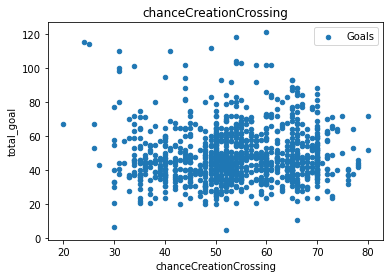

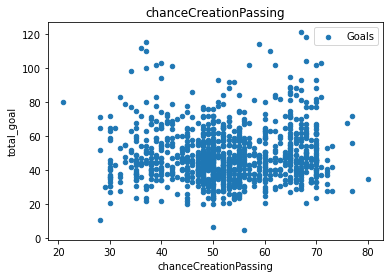

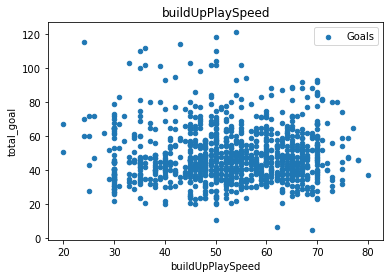

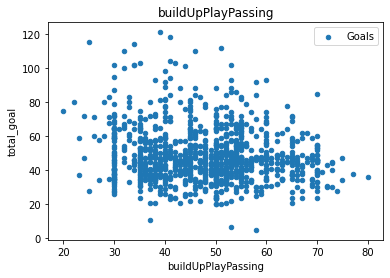

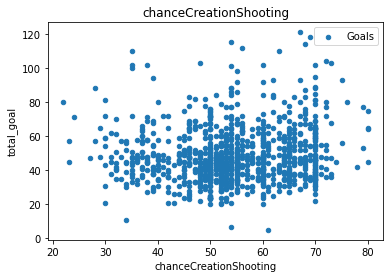

In [34]:
numerica_attributes = {"buildUpPlaySpeed","buildUpPlayPassing","chanceCreationPassing",
                       "chanceCreationCrossing","chanceCreationShooting"}
for i in numerica_attributes:
    team_goal_attributes.plot(x=i, y="total_goal", kind="scatter").set_title(i)
    plt.legend(["Goals"]);

It's clear that buildUpPlayPassing and buildUpPlaySpeed is most attributes effects in top (20) teams scored goal

### Create box plot  between number of goal for teams scrore more than 100 goals one season and categorical_attributes.

(15, 15)


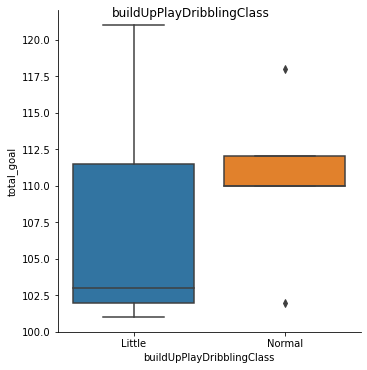

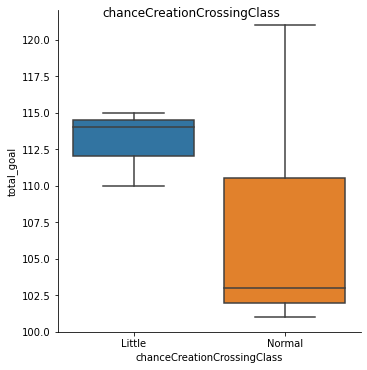

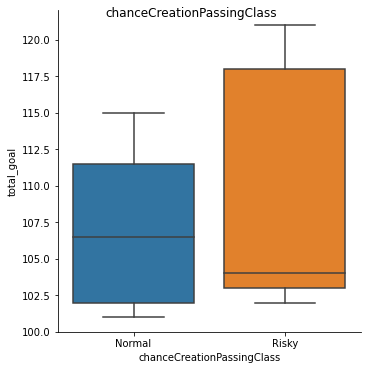

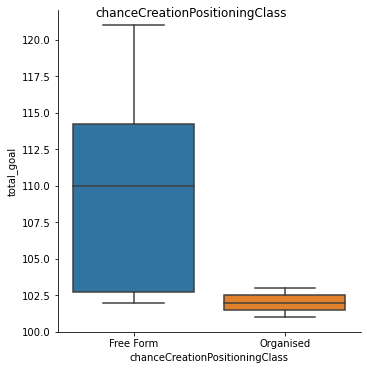

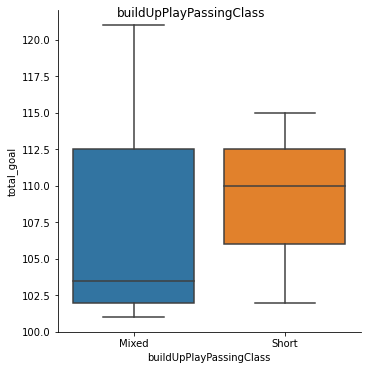

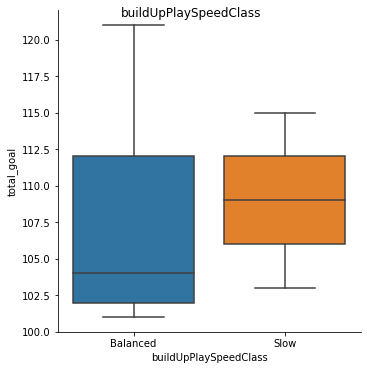

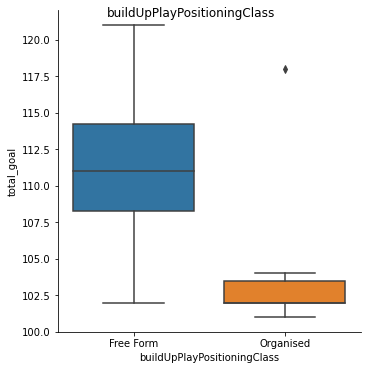

In [36]:
high_score_teams  = team_goal_attributes.query("total_goal  > 100")
print(high_score_teams.shape)

categorical_attributes = {"buildUpPlaySpeedClass","buildUpPlayDribblingClass","buildUpPlayPassingClass",
               "buildUpPlayPositioningClass","chanceCreationPassingClass","chanceCreationCrossingClass"
               ,"chanceCreationPositioningClass"}
for z in categorical_attributes:
    sns.catplot(x=z, y="total_goal", kind="box", data = high_score_teams).fig.suptitle(z)
 


The team attributes of teams with more than 80 goals is:

Slow : buildUpPlaySpeedClass 

Little : chanceCreationCrossingClass

Free form : buildUpPlayPositioningClass

## Limitations
1- In team attributes table "build up play dribbling" columns having more than 65 % null values, so negelcted this columns to avoid wrong analysis.

2- In match table there are many null values such as player name which forced me to avoid player analysis. 


<a id='conclusions'></a>
## Conclusions


- The most team socore in one season is Real Madrid in 2011 with 121 goals.	

- Real Madrid and Barcelona are most teams score goals in one season.

- buildUpPlayPassing and buildUpPlaySpeed is most attributes effects in top 20 teams scored goal.

 - The team attributes of teams with more than 80 goals is:
    - Slow : build up play speed class
    - Little : chanc creation crossing class
    - Free form : build up play positioning class





# Reference
pandas.pydata

seaborn.pydata

stackoverflow.com

kaggle

